In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecociel-data/file1.csv


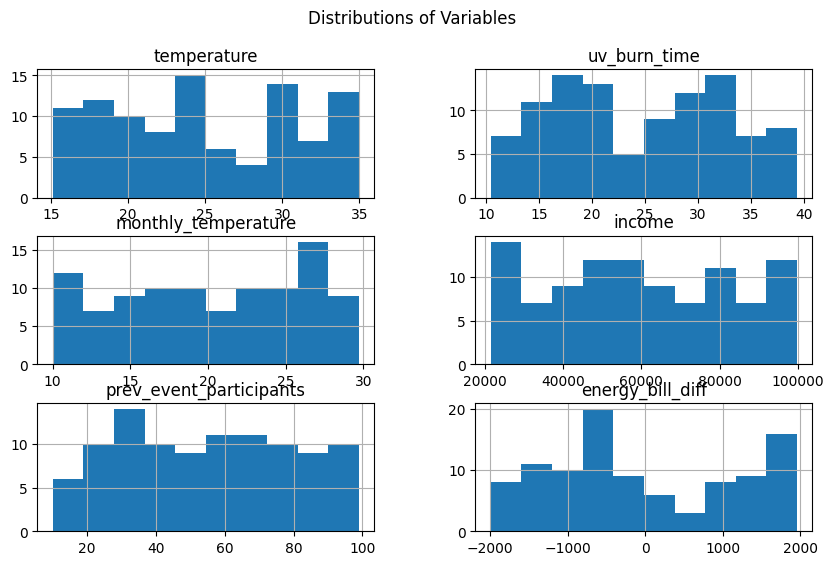

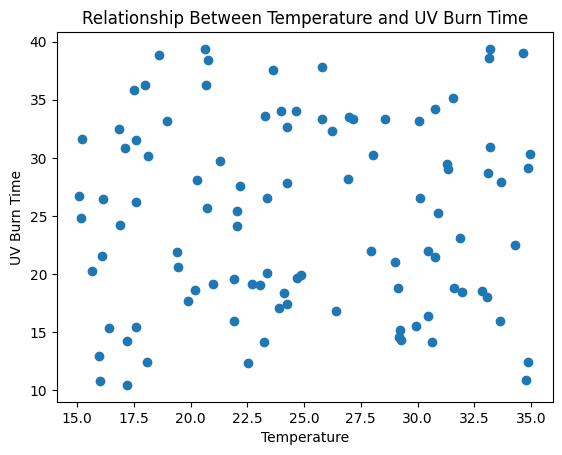

In [1]:
# Data Modelling and Simulations for custom dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Import for visualizations

# ------------------------------------------------
# # Define data ranges and distributions (based on model simulations)
# ------------------------------------------------
temperature_range = (15, 35)  # Celsius
uv_burn_time_range = (10, 40)  # minutes
monthly_temp_range = (10, 30)  # Celsius
income_range = (20000, 100000)  # INR
previous_event_success = [True, False]
prev_event_participants = (10, 100)
monthly_energy_bill_diff = (-2000, 2000)  # INR

# ------------------------------------------------
# # Generate random data (simulating model outcomes)
# ------------------------------------------------
temperature = np.random.uniform(*temperature_range, size=100)
uv_burn_time = np.random.uniform(*uv_burn_time_range, size=100)
monthly_temperature = np.random.uniform(*monthly_temp_range, size=100)
income = np.random.uniform(*income_range, size=100)
prev_event_success = np.random.choice(previous_event_success, size=100)
prev_event_participants = np.random.randint(*prev_event_participants, size=100)
energy_bill_diff = np.random.uniform(*monthly_energy_bill_diff, size=100)

# ------------------------------------------------
# # Assign badge eligibility based on simulated model criteria
# ------------------------------------------------
is_eco_commuter = (temperature < 30) & (uv_burn_time > 20) & (~np.random.choice([True, False], size=100, p=[0.2, 0.8]))
is_energy_saver = (np.abs(energy_bill_diff) > 500) & (monthly_temperature < 25) & (monthly_temperature > 15)
is_sustainable_shopper = (income > 50000) & (np.random.choice([True, False], size=100, p=[0.7, 0.3]))
is_community_leader = (prev_event_success & (prev_event_participants > 50)) | (~prev_event_success & (np.random.choice([True, False], size=100, p=[0.1, 0.9])))
is_clean_energy_champion = np.random.choice([True, False], size=100, p=[0.05, 0.95])

# ------------------------------------------------
# # Create a DataFrame for analysis
# ------------------------------------------------
data = pd.DataFrame({
    "temperature": temperature,
    "uv_burn_time": uv_burn_time,
    "monthly_temperature": monthly_temperature,
    "income": income,
    "prev_event_success": prev_event_success,
    "prev_event_participants": prev_event_participants,
    "energy_bill_diff": energy_bill_diff,
    "is_eco_commuter": is_eco_commuter,
    "is_energy_saver": is_energy_saver,
    "is_sustainable_shopper": is_sustainable_shopper,
    "is_community_leader": is_community_leader,
    "is_clean_energy_champion": is_clean_energy_champion
})

# ------------------------------------------------
# # Exploratory Data Analysis (EDA)
# ------------------------------------------------

# Visualize distributions of key variables
data.hist(figsize=(10, 6))
plt.suptitle("Distributions of Variables")
plt.show()

# Explore relationships between variables
plt.scatter(data["temperature"], data["uv_burn_time"])
plt.xlabel("Temperature")
plt.ylabel("UV Burn Time")
plt.title("Relationship Between Temperature and UV Burn Time")
plt.show()



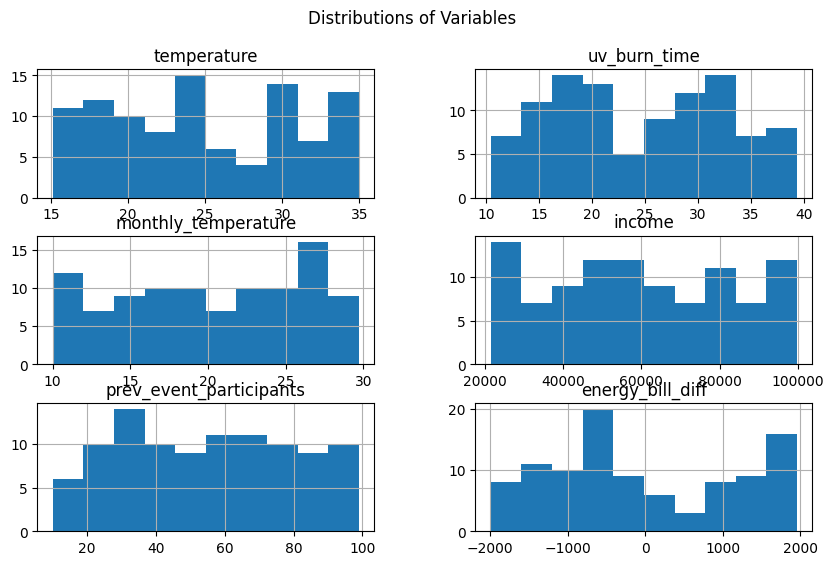

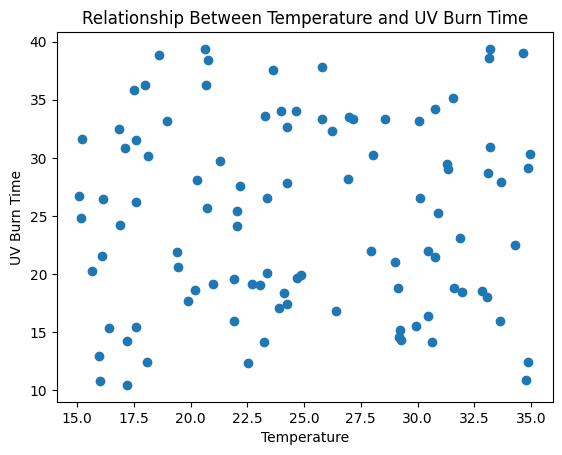

<Figure size 640x480 with 0 Axes>

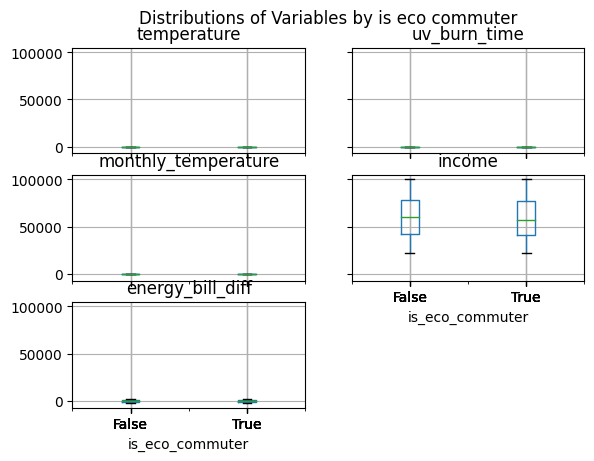

<Figure size 640x480 with 0 Axes>

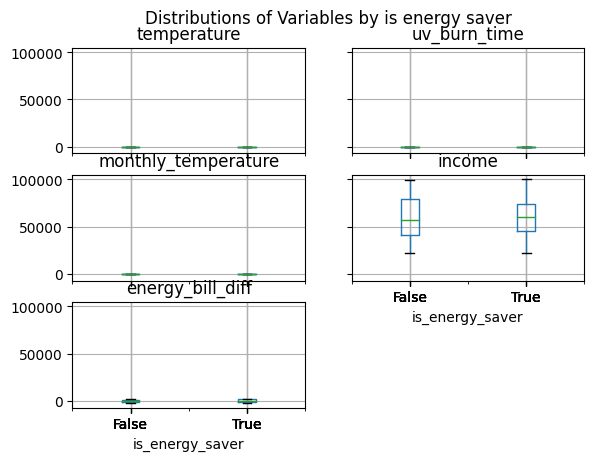

<Figure size 640x480 with 0 Axes>

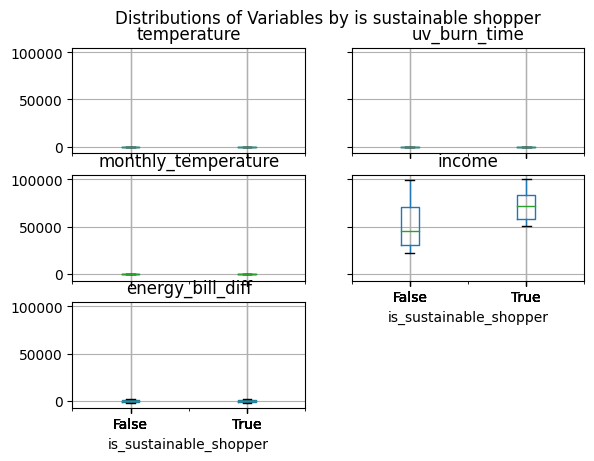

<Figure size 640x480 with 0 Axes>

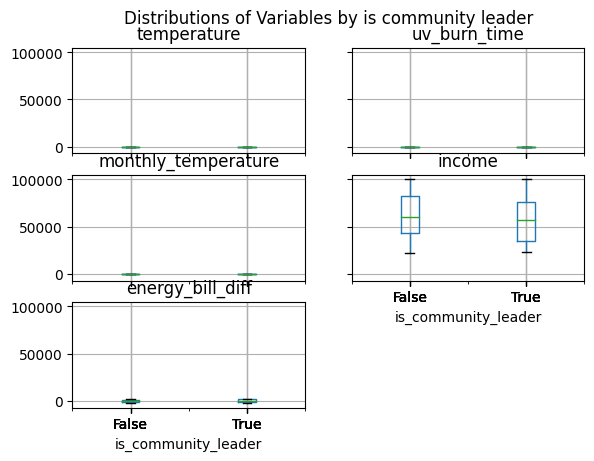

<Figure size 640x480 with 0 Axes>

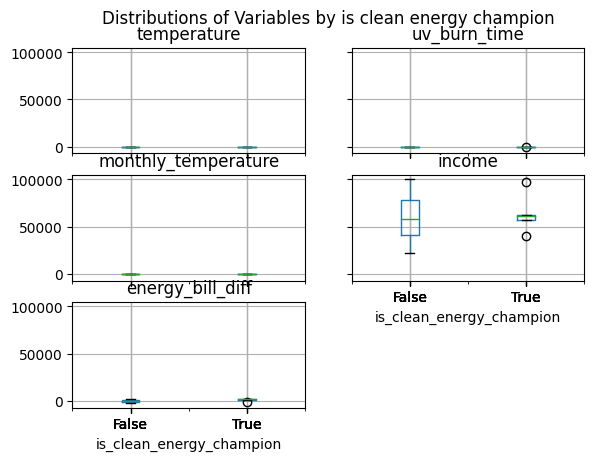

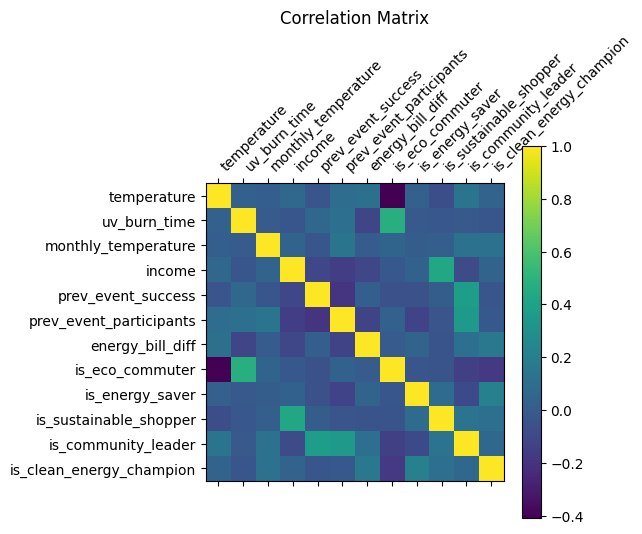

Correlation between temperature and uv_burn_time: 0.0263 (P-value: 0.7952)
Correlation between temperature and monthly_temperature: 0.0119 (P-value: 0.9068)
Correlation between temperature and income: 0.0602 (P-value: 0.5521)
Correlation between temperature and prev_event_success: -0.0366 (P-value: 0.7179)
Correlation between temperature and prev_event_participants: 0.0952 (P-value: 0.3460)
Correlation between temperature and energy_bill_diff: 0.1085 (P-value: 0.2827)
Correlation between temperature and is_eco_commuter: -0.4091 (P-value: 0.0000)
Correlation between temperature and is_energy_saver: 0.0243 (P-value: 0.8100)
Correlation between temperature and is_sustainable_shopper: -0.0691 (P-value: 0.4943)
Correlation between temperature and is_community_leader: 0.1347 (P-value: 0.1816)
Correlation between temperature and is_clean_energy_champion: 0.0401 (P-value: 0.6920)
Correlation between uv_burn_time and monthly_temperature: -0.0061 (P-value: 0.9521)
Correlation between uv_burn_tim

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# Visualize distributions of key variables
data.hist(figsize=(10, 6))
plt.suptitle("Distributions of Variables")
plt.show()

# Explore relationships between variables
plt.scatter(data["temperature"], data["uv_burn_time"])
plt.xlabel("Temperature")
plt.ylabel("UV Burn Time")
plt.title("Relationship Between Temperature and UV Burn Time")
plt.show()

# Visualize relationships with badge eligibility
for badge in ["is_eco_commuter", "is_energy_saver", "is_sustainable_shopper", "is_community_leader", "is_clean_energy_champion"]:
    plt.figure()
    data.boxplot(column=["temperature", "uv_burn_time", "monthly_temperature", "income", "energy_bill_diff"], by=badge)
    plt.suptitle(f"Distributions of Variables by {badge.replace('_', ' ')}")
    plt.show()

# Calculate and visualize correlations
correlations = data.corr()
plt.matshow(correlations)
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=45, ha="left")
plt.yticks(range(len(correlations.columns)), correlations.columns)
plt.colorbar()
plt.title("Correlation Matrix")
plt.show()

# Calculate P-index for each pair of variables
for i in range(len(correlations.columns)):
    for j in range(i + 1, len(correlations.columns)):
        corr, p_value = pearsonr(data.iloc[:, i], data.iloc[:, j])
        print(f"Correlation between {correlations.columns[i]} and {correlations.columns[j]}: {corr:.4f} (P-value: {p_value:.4f})")

In [2]:
!pip install skops

  Obtaining dependency information for skops from https://files.pythonhosted.org/packages/fd/fd/8ee9d18fa13118f4230766cc31fe66846928eca1713b1907ffd61fa86ed3/skops-0.9.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 5.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/kaggle/input/ecociel-data/file1.csv")  # Replace with your actual file path

data = data.iloc[:, 1:]

target_columns = ["is_eco_commuter", "is_energy_saver", "is_sustainable_shopper", "is_community_leader", "is_clean_energy_champion", "prev_event_success"]
data[target_columns] = data[target_columns].astype(int)

# Separate features and target variable
X = data.drop(columns=["is_eco_commuter", "is_energy_saver", "is_sustainable_shopper", "is_community_leader", "is_clean_energy_champion"])
y = data[["is_eco_commuter", "is_energy_saver", "is_sustainable_shopper", "is_community_leader", "is_clean_energy_champion"]]


print(X.head())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipe = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("model", RandomForestClassifier(n_estimators=100, random_state=125)),
    ]
)

# Train the model
pipe.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipe.predict(X_test)

print(y_pred)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


import skops.io as sio
sio.dump(pipe, "ecociel_pipeline_1.skops")


   temperature  uv_burn_time  monthly_temperature        income  \
0    31.722905     20.800592            25.474896  90318.492217   
1    19.325429     10.640833            26.723054  80697.992037   
2    15.348643     21.853943            23.029495  41230.936628   
3    28.315655     11.498881            21.067849  45523.698555   
4    26.814671     17.208440            18.708077  93401.511534   

   prev_event_success  prev_event_participants  energy_bill_diff  
0                   1                       55      -1367.850630  
1                   1                       54      -1384.749590  
2                   1                       58        985.246902  
3                   0                       27        -85.381125  
4                   1                       68       -122.811752  
[[0 0 1 0 0]
 [1 0 1 1 0]
 [1 0 0 0 0]
 ...
 [1 0 1 1 0]
 [1 0 1 0 0]
 [0 1 1 0 0]]
Accuracy: 0.634


In [4]:
import skops.io as sio

pipe = sio.load("ecociel_pipeline_1.skops", trusted=True)
def predict_badges(temperature, uv_burn_time, monthly_temperature, income, prev_event_success, prev_event_participants, energy_bill_diff):
    # Create a sample with input data
    sample = pd.DataFrame(
        [[temperature, uv_burn_time, monthly_temperature, income, prev_event_success, prev_event_participants, energy_bill_diff]],
        columns=["temperature", "uv_burn_time", "monthly_temperature", "income", "prev_event_success", "prev_event_participants", "energy_bill_diff"],
    )

    # Make predictions
    predictions = pipe.predict(sample)[0]

    # Format the output badges, directly using 0/1 values
    recommended_badges = []
    for i, badge in enumerate(["Eco-Commuter", "Energy Saver", "Sustainable Shopper", "Community Leader", "Clean Energy Champion"]):
        if predictions[i] == 1:  # Check for 1 instead of True
            recommended_badges.append(badge)

    return "Recommended badges for you: " + ", ".join(recommended_badges)


In [5]:
print(predict_badges(30, 30, 30, 90000, 1, 100, 1000))

Recommended badges for you: Sustainable Shopper, Community Leader


  Obtaining dependency information for jiwer from https://files.pythonhosted.org/packages/0d/4f/ee537ab20144811dd99321735ff92ef2b3a3230b77ed7454bed4c44d21fc/jiwer-3.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for gradio from https://files.pythonhosted.org/packages/f1/2e/da68dbda9b0b3d982749857c3a4ef8542478dc421ed8d1c5c6e5a1da915a/gradio-4.16.0-py3-none-any.whl.metadata
  Obtaining dependency information for aiofiles<24.0,>=22.0 from https://files.pythonhosted.org/packages/c5/19/5af6804c4cc0fed83f47bff6e413a98a36618e7d40185cd36e69737f3b0e/aiofiles-23.2.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for gradio-client==0.8.1 from https://files.pythonhosted.org/packages/55/25/caf754ea7959ad12bdb08aabcda88c4092ce0210004f4f81f58c9965c871/gradio_client-0.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for httpx from https://files.pythonhosted.org/packages/39/9b/4937d841aee9c2c8102d9a4eeb800c7dad2538

In [10]:
!pip install gradio_client

In [22]:
from gradio_client import Client

client = Client("https://agrkushal-testing-ecoceil.hf.space/--replicas/2fkou/")
result = client.submit(
		30,	# float  in 'Temperature' Number component
		30,	# float  in 'UV Burn Time' Number component
		30,	# float  in 'Monthly Temperature' Number component
		30000,	# float  in 'Income' Number component
		1,	# float  in 'Previous Event Success' Number component
		10,	# float  in 'Previous Event Participants' Number component
		300,	# float  in 'Energy Bill Difference' Number component
		api_name="/predict"
)
print(result)



Loaded as API: https://agrkushal-testing-ecoceil.hf.space/--replicas/2fkou/ ✔
<Job at 0x7c4af0836650 state=running>


In [23]:
print(result)

<Job at 0x7c4af0836650 state=finished returned str>
